In [1]:
import pandas as pd

In [2]:
!wget -O Cust_Segmentation.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv

--2019-01-14 17:47:28--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34276 (33K) [text/csv]
Saving to: ‘Cust_Segmentation.csv’

Cust_Segmentation.c 100%[===================>]  33.47K  --.-KB/s    in 0.05s   

2019-01-14 17:47:30 (626 KB/s) - ‘Cust_Segmentation.csv’ saved [34276/34276]



In [3]:
df = pd.read_csv('Cust_Segmentation.csv')

In [4]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [5]:
df.isna().any()

Customer Id        False
Age                False
Edu                False
Years Employed     False
Income             False
Card Debt          False
Other Debt         False
Defaulted           True
Address            False
DebtIncomeRatio    False
dtype: bool

In [6]:
df.drop(['Address'],axis = 1,inplace = True)

In [7]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [8]:
import numpy as np

In [9]:
df.columns

Index(['Customer Id', 'Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'Defaulted', 'DebtIncomeRatio'],
      dtype='object')

In [11]:
from sklearn import preprocessing

In [12]:
df.replace(np.nan,0,inplace = True)

In [17]:
X = df[['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt',
       'Other Debt', 'Defaulted', 'DebtIncomeRatio']].values

In [18]:
df.isna().any()

Customer Id        False
Age                False
Edu                False
Years Employed     False
Income             False
Card Debt          False
Other Debt         False
Defaulted          False
DebtIncomeRatio    False
dtype: bool

In [19]:
x = preprocessing.StandardScaler().fit(X).transform(X)

In [20]:
x[0:4]

array([[ 0.74291541,  0.31212243, -0.37878978, -0.71845859, -0.68381116,
        -0.59048916, -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 ,  1.38432469,  1.41447366,
         1.51296181, -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 ,  0.26803233,  2.13414111,
         0.80170393,  1.90913822,  1.59755385],
       [-0.75023477,  0.31212243, -0.67404087, -0.71845859, -0.42164323,
        -0.75446707, -0.52379654, -0.57652509]])

In [21]:
from sklearn.cluster import KMeans

In [22]:
k_means = KMeans(init = 'k-means++',n_clusters = 3,n_init = 12)

In [23]:
k_means.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=12, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [24]:
labels = k_means.labels_

In [25]:
df['Clusters'] = labels

In [26]:
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clusters
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,0
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


In [27]:
np.pi

3.141592653589793

In [28]:
import matplotlib.pyplot as plt

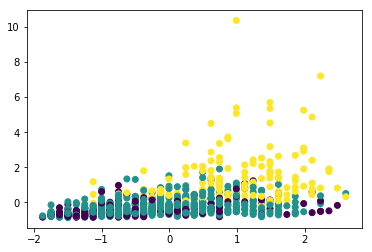

In [37]:
plt.scatter(x[:,0],x[:,3],c = labels.astype(np.float))

In [ ]:
train['sex'] = train['']